In [ ]:
Normalizing Data

Objectives
Identify duplicate rows and remove them.

Check and handle missing values in key columns.

Identify and normalize compensation-related columns.

Visualize the effect of normalization techniques on data distributions.

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
Section 1: Handling Duplicates
Task 1: Identify and remove duplicate rows.

In [5]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, view duplicate rows (optional step)
# print(duplicate_rows)

Number of duplicate rows: 0


In [ ]:
Section 2: Handling Missing Values
Task 2: Identify missing values in CodingActivities

In [6]:
# Identify missing values in 'CodingActivities' column
missing_coding_activities = df['CodingActivities'].isnull().sum()

# Display result
print(f"Number of missing rows in 'CodingActivities': {missing_coding_activities}")


Number of missing rows in 'CodingActivities': 10971


In [ ]:
Task 3: Impute missing values in CodingActivities with forward-fill.

In [9]:
# Impute missing values in 'CodingActivities' with forward-fill
# Forward-fill without warning (future-proof)
df['CodingActivities'] = df['CodingActivities'].ffill()

# Verify if any missing values remain
missing_after_ffill = df['CodingActivities'].isnull().sum()
print(f"Number of missing rows in 'CodingActivities' after forward-fill: {missing_after_ffill}")


Number of missing rows in 'CodingActivities' after forward-fill: 0


In [ ]:
Section 3: Normalizing Compensation Data
Task 4: Identify compensation-related columns, such as ConvertedCompYearly.

In [8]:
# Define compensation-related keywords
comp_keywords = ['compensation', 'salary', 'pay', 'income', 'wage']

# Find columns that match any of the keywords
comp_columns = [col for col in df.columns if any(keyword.lower() in col.lower() for keyword in comp_keywords)]

# Display the compensation-related columns
print(f"Compensation-related columns found: {comp_columns}")


Compensation-related columns found: []


In [ ]:
Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.

In [12]:
# How many non-missing values in ConvertedCompYearly?
valid_values_count = df['ConvertedCompYearly'].notnull().sum()
print(f"Number of non-missing values in ConvertedCompYearly: {valid_values_count}")


Number of non-missing values in ConvertedCompYearly: 23435


In [19]:
# Check that 'ConvertedCompYearly' exists
# Min-Max Scaling
min_value = df['ConvertedCompYearly'].min()
max_value = df['ConvertedCompYearly'].max()

df['ConvertedCompYearly_Normalized'] = (df['ConvertedCompYearly'] - min_value) / (max_value - min_value)

# Display only rows where ConvertedCompYearly is not NaN
print(df[df['ConvertedCompYearly'].notnull()][['ConvertedCompYearly', 'ConvertedCompYearly_Normalized']].head())


     ConvertedCompYearly  ConvertedCompYearly_Normalized
72                7322.0                        0.000450
374              30074.0                        0.001850
379              91295.0                        0.005616
385              53703.0                        0.003303
389             110000.0                        0.006766


In [ ]:
Task 6: Apply Z-score Normalization to ConvertedCompYearly

In [21]:
# Task 6: Apply Z-score Normalization to ConvertedCompYearly

# Z-score Normalization
mean_value = df['ConvertedCompYearly'].mean()
std_value = df['ConvertedCompYearly'].std()

df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_value) / std_value

# Display only rows where ConvertedCompYearly is not NaN
print(df[df['ConvertedCompYearly'].notnull()][['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


     ConvertedCompYearly  ConvertedCompYearly_Zscore
72                7322.0                   -0.422117
374              30074.0                   -0.300290
379              91295.0                    0.027521
385              53703.0                   -0.173767
389             110000.0                    0.127678


In [ ]:
Section 4: Visualization of Normalized Data
Task 7: Visualize the distribution of ConvertedCompYearly, ConvertedCompYearly_Normalized, and ConvertedCompYearly_Zscore

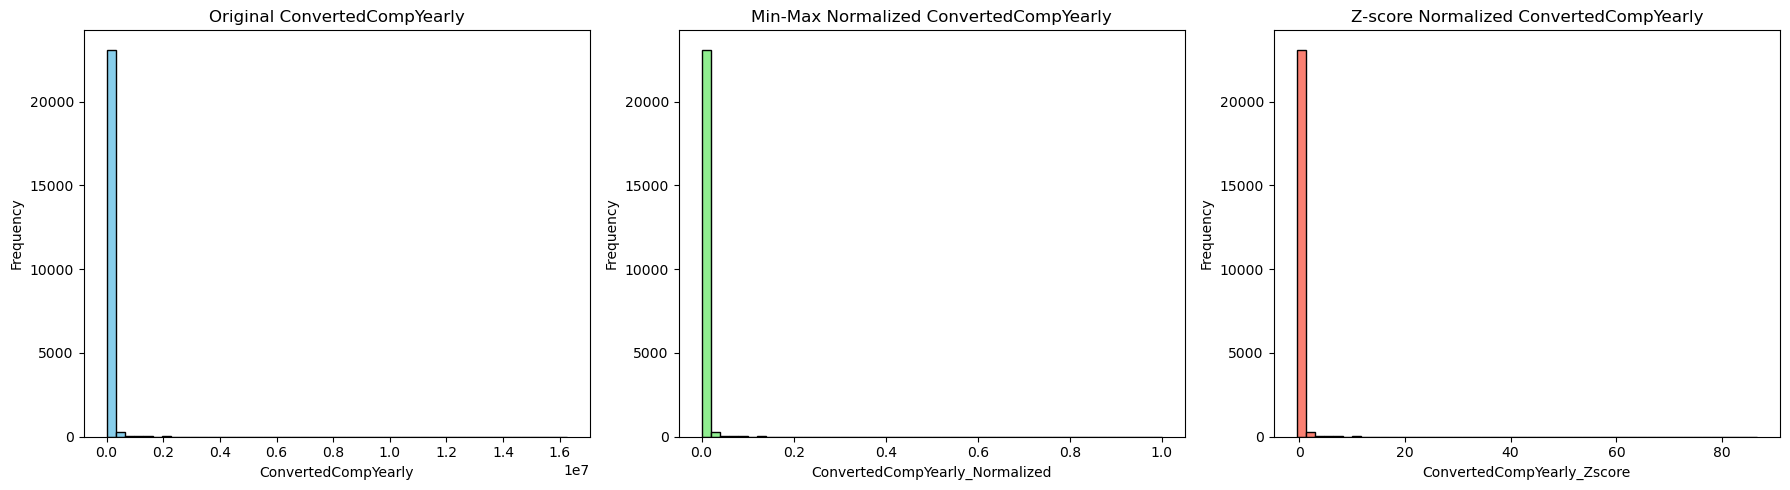

In [26]:
import matplotlib.pyplot as plt

# Step 1: Create valid_df (only rows with valid ConvertedCompYearly)
valid_df = df[df['ConvertedCompYearly'].notnull()]

# Step 2: Set up the figure and axes (3 side-by-side plots)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Step 3: Plot Original ConvertedCompYearly
axes[0].hist(valid_df['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Original ConvertedCompYearly')
axes[0].set_xlabel('ConvertedCompYearly')
axes[0].set_ylabel('Frequency')

# Step 4: Plot Min-Max Normalized ConvertedCompYearly
axes[1].hist(valid_df['ConvertedCompYearly_Normalized'], bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Min-Max Normalized ConvertedCompYearly')
axes[1].set_xlabel('ConvertedCompYearly_Normalized')
axes[1].set_ylabel('Frequency')

# Step 5: Plot Z-score Normalized ConvertedCompYearly
axes[2].hist(valid_df['ConvertedCompYearly_Zscore'], bins=50, color='salmon', edgecolor='black')
axes[2].set_title('Z-score Normalized ConvertedCompYearly')
axes[2].set_xlabel('ConvertedCompYearly_Zscore')
axes[2].set_ylabel('Frequency')

# Step 6: Adjust layout
plt.tight_layout()
plt.show()
